# Import Libraries

In [76]:
import pandas as pd #pip install pandas
import matplotlib.pyplot as plt #pip install matplotlib

from sklearn.preprocessing import LabelEncoder, RobustScaler #pip install scikit-learn
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTENC #pip install imblearn

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Import Data

In [14]:
#Read a table file
df = pd.read_table("C:/Users/iakov/Desktop/James/Uni/ΠΑΠΕΙ/Τ.ΠΛ/6οΕξάμηνο/ΑναλυτικήΔεδομένων/Project/bank_full_text_data.txt", names = ["age", "job", "marital", "education",
                   "default", "balance", "housing", "loan", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"], skiprows = 1)
#Check dimensions of the data (number of records x number of features)
df.shape

(45211, 17)

In [15]:
#Show the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
#Use part of the dataset
df = df[["age", "balance", "housing", "loan", "duration", "y"]]
df.head()

,age,balance,housing,loan,duration,y
0,58,2143,yes,no,261,no
1,44,29,yes,no,151,no
2,33,2,yes,yes,76,no
3,47,1506,yes,no,92,no
4,33,1,no,no,198,no


In [17]:
#Target Variable number of Classes
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

# Categorical Feature Encoding

In [18]:
#Dummy code the categorical features
dummy1 = pd.get_dummies(df["housing"], prefix = 'housing-', prefix_sep = '' , dtype = int)
dummy2 = pd.get_dummies(df["loan"], prefix = 'loan-', prefix_sep = '' , dtype = int)
dummy1.shape, dummy2.shape

((45211, 2), (45211, 2))

In [19]:
#Concatenate the dummy encoded categorical features to df
df_final = pd.concat([df, dummy1, dummy2], axis = 1)
df_final.head()

,age,balance,housing,loan,duration,y,housing-no,housing-yes,loan-no,loan-yes
0,58,2143,yes,no,261,no,0,1,1,0
1,44,29,yes,no,151,no,0,1,1,0
2,33,2,yes,yes,76,no,0,1,0,1
3,47,1506,yes,no,92,no,0,1,1,0
4,33,1,no,no,198,no,1,0,1,0


In [20]:
#Drop features "housing" and "loan"
df_final = df_final.drop(["housing", "loan"], axis = 1)
df_final.head()

,age,balance,duration,y,housing-no,housing-yes,loan-no,loan-yes
0,58,2143,261,no,0,1,1,0
1,44,29,151,no,0,1,1,0
2,33,2,76,no,0,1,0,1
3,47,1506,92,no,0,1,1,0
4,33,1,198,no,1,0,1,0


In [21]:
#Label encoding the target variable "y"
df_final["y"] = LabelEncoder().fit_transform(df_final["y"])
df_final.head()

,age,balance,duration,y,housing-no,housing-yes,loan-no,loan-yes
0,58,2143,261,0,0,1,1,0
1,44,29,151,0,0,1,1,0
2,33,2,76,0,0,1,0,1
3,47,1506,92,0,0,1,1,0
4,33,1,198,0,1,0,1,0


# Data Splitting

In [22]:
#Form X and Y data
Y = df_final["y"]
X = df_final.drop(["y"], axis = 1)
Y.shape, X.shape

((45211,), (45211, 7))

In [23]:
#Show X data
X.head()

,age,balance,duration,housing-no,housing-yes,loan-no,loan-yes
0,58,2143,261,0,1,1,0
1,44,29,151,0,1,1,0
2,33,2,76,0,1,0,1
3,47,1506,92,0,1,1,0
4,33,1,198,1,0,1,0


In [24]:
#Split to train-test-validation data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 34, test_size = 0.10, stratify = df_final["y"])
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.10, random_state = 37)
(X_train.shape, X_test.shape, X_valid.shape), (Y_train.shape, Y_test.shape, Y_valid.shape)

(((36620, 7), (4522, 7), (4069, 7)), ((36620,), (4522,), (4069,)))

In [25]:
#Show X_train data
X_train.head()

,age,balance,duration,housing-no,housing-yes,loan-no,loan-yes
3260,45,959,463,0,1,1,0
23127,46,326,182,1,0,1,0
23391,35,753,111,1,0,1,0
5884,32,3,114,0,1,1,0
40568,34,5973,326,0,1,1,0


In [26]:
#Scale the numeric data
scaler = RobustScaler()
X_train[X_train.columns[0:3]] = scaler.fit_transform(X_train[X_train.columns[0:3]])
X_test[X_test.columns[0:3]] = scaler.transform(X_test[X_test.columns[0:3]])
X_valid[X_valid.columns[0:3]] = scaler.transform(X_valid[X_valid.columns[0:3]])
(X_train.shape, X_test.shape, X_valid.shape)

((36620, 7), (4522, 7), (4069, 7))

In [27]:
#Show X_train data (but scaled now)
X_train.head()

,age,balance,duration,housing-no,housing-yes,loan-no,loan-yes
3260,0.400000,0.380313,1.310185,0,1,1,0
23127,0.466667,-0.091723,0.009259,1,0,1,0
23391,-0.266667,0.226696,-0.319444,1,0,1,0
5884,-0.466667,-0.332588,-0.305556,0,1,1,0
40568,-0.333333,4.119314,0.675926,0,1,1,0


# Classification without SMOTENC

MLP1 - One-Layer Perceptron (1 Neuron)

In [28]:
#Define MLP
mlp1 = MLPClassifier(hidden_layer_sizes = (1,), activation = "relu", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp1.fit(X_train, Y_train)
#Test Predictions
mlp1_Y_pred_test = mlp1.predict(X_test)
#Validation Predictions
mlp1_Y_pred_valid = mlp1.predict(X_valid)
#Weights
mlp1.coefs_

C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[array([[ 0.00878898],
        [-0.01763712],
        [-0.55154374],
        [ 0.79188592],
        [ 1.37796569],
        [-0.24907934],
        [ 0.17458562]]),
 array([[-2.29185126]])]

In [29]:
#Bias
mlp1.intercepts_

[array([0.55480672]), array([0.37579295])]

In [30]:
#Number of Layers
mlp1.n_layers_

3

In [31]:
#Output Activation Function
mlp1.out_activation_

'logistic'

In [32]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp1_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3993
           1       0.52      0.30      0.38       529

    accuracy                           0.89      4522
   macro avg       0.72      0.63      0.66      4522
weighted avg       0.87      0.89      0.87      4522



In [33]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp1_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3599
           1       0.51      0.30      0.37       470

    accuracy                           0.89      4069
   macro avg       0.71      0.63      0.66      4069
weighted avg       0.87      0.89      0.87      4069



<Figure size 0.2x0.2 with 0 Axes>

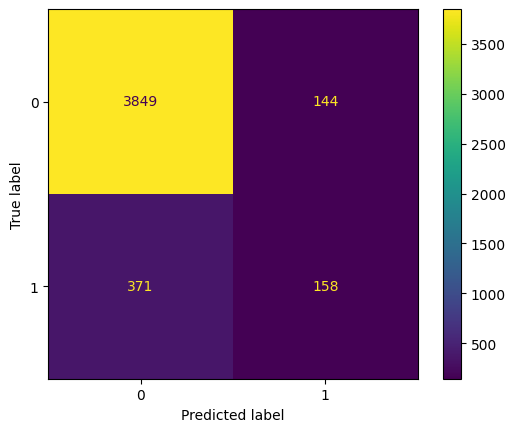

In [ ]:
#MLP1 Test Data Confusion Matrix
mlp1_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp1_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp1_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

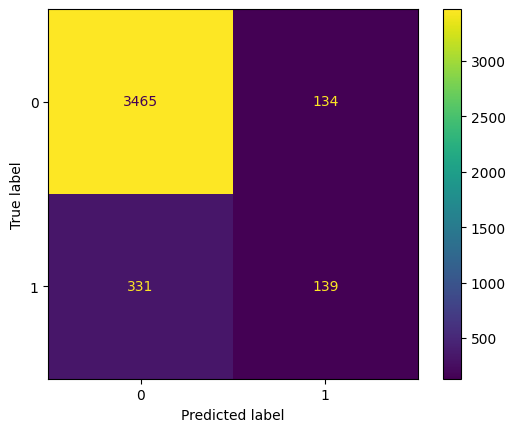

In [ ]:
#MLP1 Validation Data Confusion Matrix
mlp1_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp1_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp1_cm_valid.plot()
plt.show()

MLP2 - Multy-Layer Perceptron (2 Hidden Layers, 1 Neuron per Layer)

In [36]:
#Define MLP
mlp2 = MLPClassifier(hidden_layer_sizes = (1,1), activation = "relu", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp2.fit(X_train, Y_train)
#Test Predictions
mlp2_Y_pred_test = mlp2.predict(X_test)
#Validation Predictions
mlp2_Y_pred_valid = mlp2.predict(X_valid)
#Weights
mlp2.coefs_

C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[array([[-0.00959481],
        [ 0.03146573],
        [ 0.61621084],
        [ 1.04607027],
        [ 0.42594375],
        [-0.40502201],
        [-0.91483134]]),
 array([[-1.53882522]]),
 array([[-1.60571596]])]

In [37]:
#Bias
mlp2.intercepts_

[array([0.16198935]), array([2.38681772]), array([-0.23323724])]

In [38]:
#Number of Layers
mlp2.n_layers_

4

In [39]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp2_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3993
           1       0.00      0.00      0.00       529

    accuracy                           0.88      4522
   macro avg       0.44      0.50      0.47      4522
weighted avg       0.78      0.88      0.83      4522



C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [40]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp2_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3599
           1       0.00      0.00      0.00       470

    accuracy                           0.88      4069
   macro avg       0.44      0.50      0.47      4069
weighted avg       0.78      0.88      0.83      4069



C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

<Figure size 0.2x0.2 with 0 Axes>

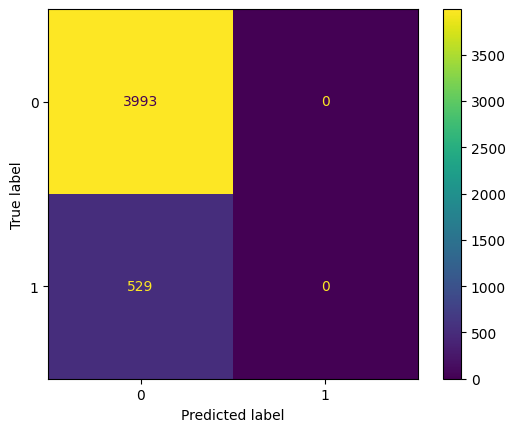

In [ ]:
#MLP2 Test Data Confusion Matrix
mlp2_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp2_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp2_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

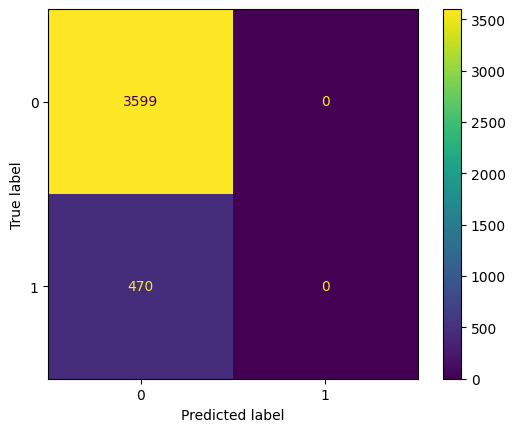

In [ ]:
#MLP2 Validation Data Confusion Matrix
mlp2_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp2_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp2_cm_valid.plot()
plt.show()

MLP3 - Multi-Layer Perceptron (9 Hidden Layers)

In [43]:
#Define MLP
mlp3 = MLPClassifier(hidden_layer_sizes = (16, 32, 64, 128, 512, 128, 64, 32, 16), activation = "tanh", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp3.fit(X_train, Y_train)
#Test Predictions
mlp3_Y_pred_test = mlp3.predict(X_test)
#Validation Predictions
mlp3_Y_pred_valid = mlp3.predict(X_valid)

C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp3_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3993
           1       0.52      0.28      0.37       529

    accuracy                           0.89      4522
   macro avg       0.71      0.62      0.65      4522
weighted avg       0.86      0.89      0.87      4522



In [45]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp3_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3599
           1       0.58      0.32      0.41       470

    accuracy                           0.89      4069
   macro avg       0.75      0.65      0.68      4069
weighted avg       0.88      0.89      0.88      4069



<Figure size 0.2x0.2 with 0 Axes>

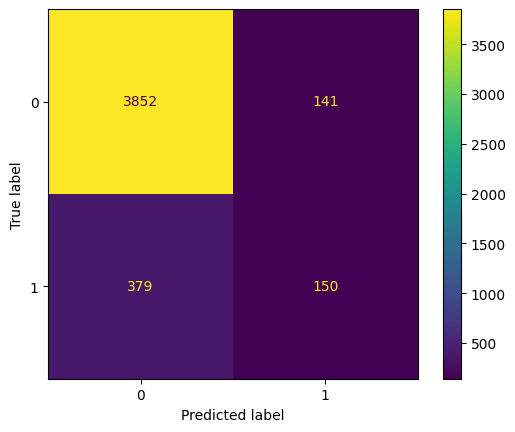

In [ ]:
#MLP3 Test Data Confusion Matrix
mlp3_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp3_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp3_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

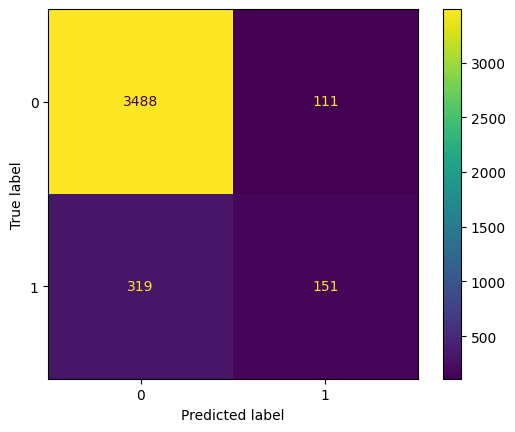

In [ ]:
#MLP3 Validation Data Confusion Matrix
mlp3_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp3_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp3_cm_valid.plot()
plt.show()

MLP4 - Multi-Layer Perceptron (19 Hidden Layers)

In [48]:
#Define MLP
mlp4 = MLPClassifier(hidden_layer_sizes = (16, 32, 64, 128, 256, 512, 1024, 512, 256, 128, 64, 32, 16), activation = "tanh", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp4.fit(X_train, Y_train)
#Test Predictions
mlp4_Y_pred_test = mlp4.predict(X_test)
#Validation Predictions
mlp4_Y_pred_valid = mlp4.predict(X_valid)

In [49]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp4_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3993
           1       0.57      0.14      0.23       529

    accuracy                           0.89      4522
   macro avg       0.73      0.56      0.58      4522
weighted avg       0.86      0.89      0.86      4522



In [50]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp4_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3599
           1       0.65      0.17      0.27       470

    accuracy                           0.89      4069
   macro avg       0.78      0.58      0.61      4069
weighted avg       0.87      0.89      0.87      4069



<Figure size 0.2x0.2 with 0 Axes>

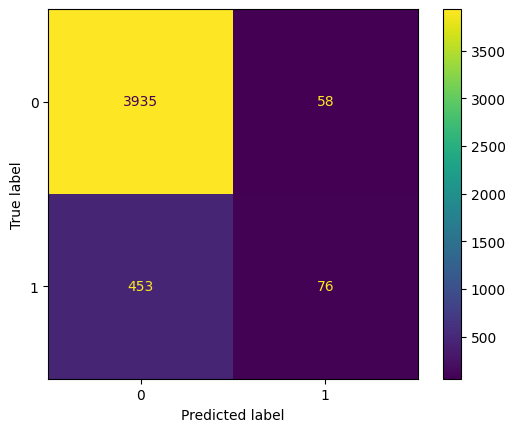

In [51]:
#MLP4 Test Data Confusion Matrix
mlp4_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp4_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp4_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

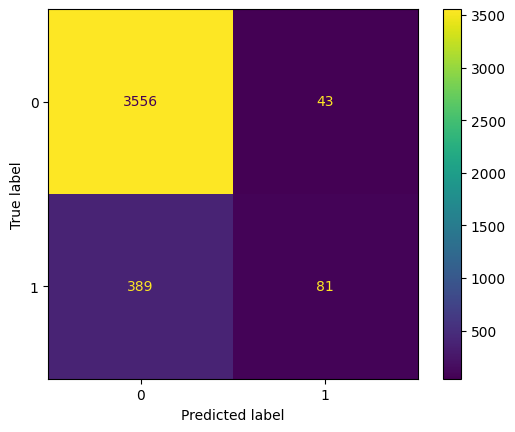

In [52]:
#MLP4 Test Data Confusion Matrix
mlp4_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp4_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp4_cm_valid.plot()
plt.show()

# SMOTENC Sampling

In [53]:
sm = SMOTENC(categorical_features = list(range(3, X_train.shape[1])), sampling_strategy = "minority", random_state = 2, k_neighbors = 5)
X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)
X_train_sm.shape, Y_train_sm.shape, Y_train_sm.value_counts()

((64660, 7),
 (64660,),
 y
 0    32330
 1    32330
 Name: count, dtype: int64)

# Classification with SMOTENC 

MLP1 - One-Layer Perceptron (1 Neuron) - Smote

In [54]:
#Define MLP
mlp1_sm = MLPClassifier(hidden_layer_sizes = (1, ), activation = "tanh", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp1_sm.fit(X_train_sm, Y_train_sm)
#Test Predictions
mlp1_sm_Y_pred_test = mlp1_sm.predict(X_test)
#Validation Predictions
mlp1_sm_Y_pred_valid = mlp1_sm.predict(X_valid)
#Weights
mlp1_sm.coefs_

C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[array([[ 0.02598372],
        [-0.02987367],
        [-0.7887934 ],
        [ 0.29066773],
        [ 0.95971284],
        [-0.62800035],
        [-0.12368707]]),
 array([[-2.59488531]])]

In [55]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp1_sm_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      3993
           1       0.30      0.78      0.44       529

    accuracy                           0.76      4522
   macro avg       0.63      0.77      0.64      4522
weighted avg       0.89      0.76      0.80      4522



In [56]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp1_sm_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      3599
           1       0.30      0.78      0.44       470

    accuracy                           0.77      4069
   macro avg       0.63      0.77      0.64      4069
weighted avg       0.89      0.77      0.80      4069



<Figure size 0.2x0.2 with 0 Axes>

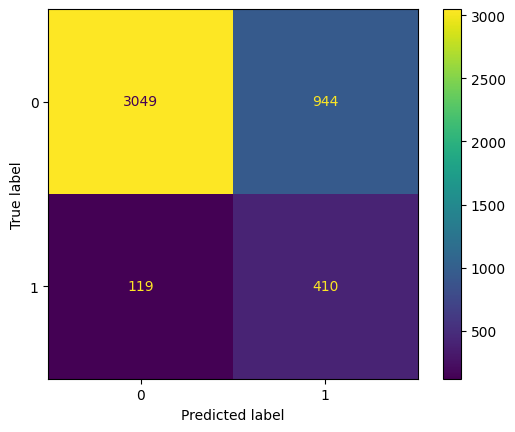

In [57]:
#MLP1 Test Data Confusion Matrix
mlp1_sm_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp1_sm_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp1_sm_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

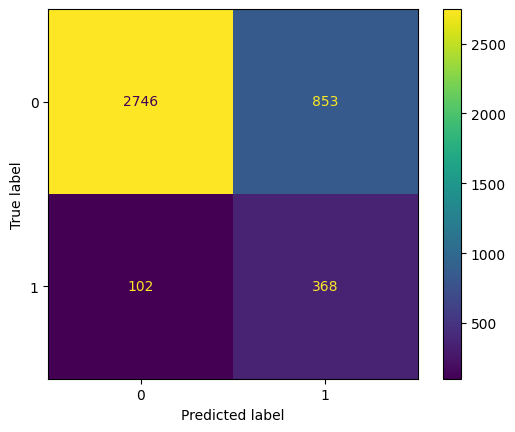

In [ ]:
#MLP1 Validation Data Confusion Matrix
mlp1_sm_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp1_sm_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp1_sm_cm_valid.plot()
plt.show()

MLP2 - One-Layer Perceptron (2 Hidden Layers, 1 Neuron per Layer) - Smote

In [59]:
#Define MLP
mlp2_sm = MLPClassifier(hidden_layer_sizes = (1,2), activation = "relu", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp2_sm.fit(X_train_sm, Y_train_sm)
#Test Predictions
mlp2_sm_Y_pred_test = mlp2_sm.predict(X_test)
#Validation Predictions
mlp2_sm_Y_pred_valid = mlp2_sm.predict(X_valid)
#Weights
mlp2_sm.coefs_

[array([[-0.04660895],
        [ 0.05857669],
        [ 1.09559563],
        [ 1.56877431],
        [ 0.33832211],
        [-0.06850688],
        [-0.89760273]]),
 array([[8.28290656e-63, 1.40033314e+00]]),
 array([[-4.05768700e-94],
        [ 7.13556276e-01]])]

In [60]:
#Bias
mlp2_sm.intercepts_

[array([0.58586662]), array([-0.28535579, -0.00326994]), array([-2.22111862])]

In [61]:
#Number of Layers
mlp2_sm.n_layers_

4

In [62]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp2_sm_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      3993
           1       0.33      0.74      0.46       529

    accuracy                           0.79      4522
   macro avg       0.64      0.77      0.66      4522
weighted avg       0.89      0.79      0.82      4522



In [63]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp2_sm_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      3599
           1       0.33      0.74      0.45       470

    accuracy                           0.79      4069
   macro avg       0.64      0.77      0.66      4069
weighted avg       0.89      0.79      0.82      4069



<Figure size 0.2x0.2 with 0 Axes>

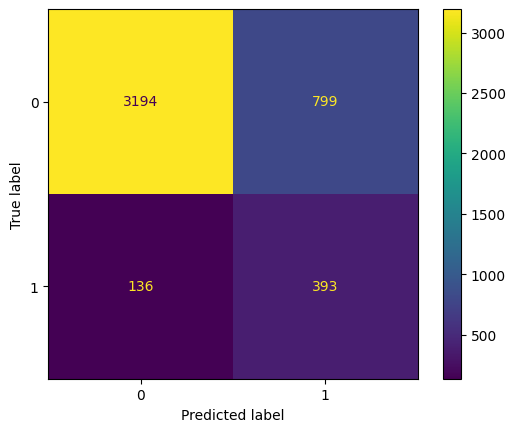

In [64]:
#MLP2 Test Data Confusion Matrix
mlp2_sm_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp2_sm_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp2_sm_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

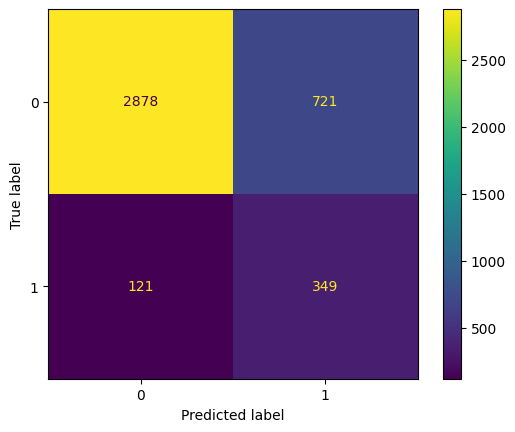

In [65]:
#MLP2 Validation Data Confusion Matrix
mlp2_sm_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp2_sm_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp2_sm_cm_valid.plot()
plt.show()

MLP3 - Multi-Layer Perceptron (9 Hidden Layers) - Smote

In [66]:
#Define MLP
mlp3_sm = MLPClassifier(hidden_layer_sizes = (16, 32, 64, 128, 512, 128, 64, 32, 16), activation = "tanh", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp3_sm.fit(X_train_sm, Y_train_sm)
#Test Predictions
mlp3_sm_Y_pred_test = mlp3_sm.predict(X_test)
#Validation Predictions
mlp3_sm_Y_pred_valid = mlp3_sm.predict(X_valid)

C:\Users\iakov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp3_sm_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      3993
           1       0.31      0.76      0.44       529

    accuracy                           0.77      4522
   macro avg       0.64      0.77      0.65      4522
weighted avg       0.88      0.77      0.81      4522



In [68]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp3_sm_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      3599
           1       0.32      0.77      0.45       470

    accuracy                           0.78      4069
   macro avg       0.64      0.78      0.66      4069
weighted avg       0.89      0.78      0.82      4069



<Figure size 0.2x0.2 with 0 Axes>

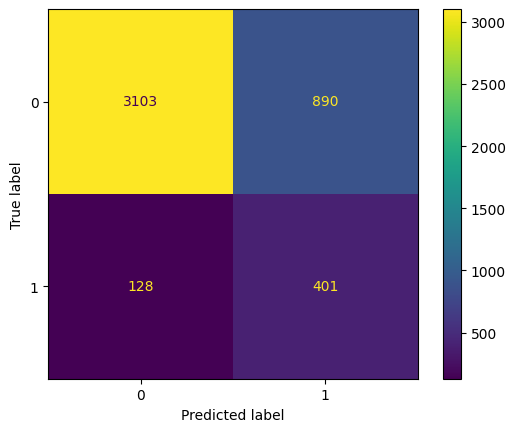

In [69]:
#MLP3 Test Data Confusion Matrix
mlp3_sm_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp3_sm_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp3_sm_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

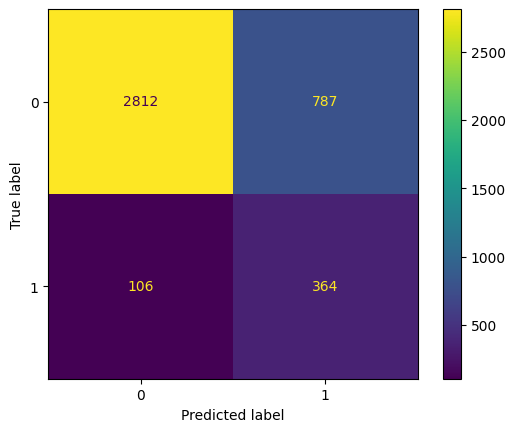

In [70]:
#MLP3 Validation Data Confusion Matrix
mlp3_sm_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp3_sm_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp3_sm_cm_valid.plot()
plt.show()

MLP4 - Multi-Layer Perceptron (19 Hidden Layers) - Smote

In [71]:
#Define MLP
mlp4_sm = MLPClassifier(hidden_layer_sizes = (16, 32, 64, 128, 256, 512, 1024, 512, 256, 128, 64, 32, 16), activation = "tanh", solver = "adam", learning_rate = "constant", learning_rate_init = 0.001, max_iter = 30, tol = 0.0001, random_state = 81)
#Fit MLP
mlp4_sm.fit(X_train_sm, Y_train_sm)
#Test Predictions
mlp4_sm_Y_pred_test = mlp4_sm.predict(X_test)
#Validation Predictions
mlp4_sm_Y_pred_valid = mlp4_sm.predict(X_valid)

In [72]:
#Test Data Classification Report
print("Classification Report for Test Data")
print(classification_report(Y_test, mlp4_sm_Y_pred_test))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      3993
           1       0.27      0.84      0.41       529

    accuracy                           0.72      4522
   macro avg       0.62      0.77      0.61      4522
weighted avg       0.89      0.72      0.77      4522



In [73]:
#Validation Data Classification Report
print("Classification Report for Validation Data")
print(classification_report(Y_valid, mlp4_sm_Y_pred_valid))

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.97      0.70      0.82      3599
           1       0.27      0.85      0.41       470

    accuracy                           0.72      4069
   macro avg       0.62      0.78      0.61      4069
weighted avg       0.89      0.72      0.77      4069



<Figure size 0.2x0.2 with 0 Axes>

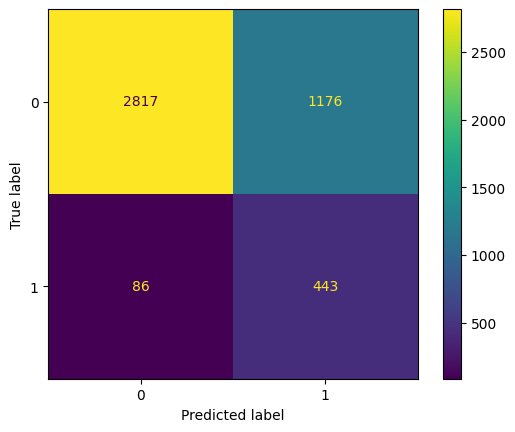

In [74]:
#MLP4 Test Data Confusion Matrix
mlp4_sm_cm_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, mlp4_sm_Y_pred_test), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp4_sm_cm_test.plot()
plt.show()

<Figure size 0.2x0.2 with 0 Axes>

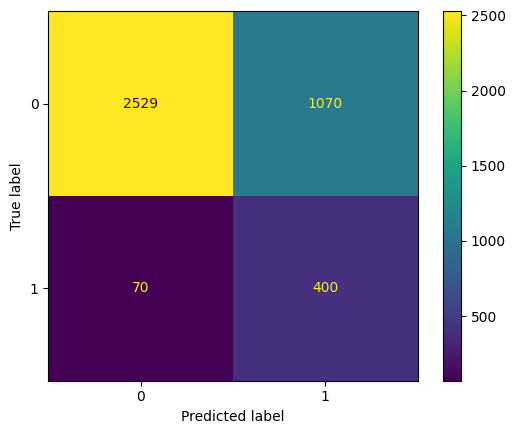

In [75]:
#MLP4 Test Data Confusion Matrix
mlp4_sm_cm_valid = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_valid, mlp4_sm_Y_pred_valid), display_labels = [0, 1])
plt.figure(figsize = (0.002, 0.002))
mlp4_sm_cm_valid.plot()
plt.show()